In [1]:
%matplotlib inline
import pystokes, pyforces
import numpy as np, matplotlib.pyplot as plt

In [2]:
# particle radius, self-propulsion speed, fluid viscosity
b, vs, eta = 1.0, 0.4, 0.1

Nf, nm  = 2, 3                            # Nf: number of polymers and nm is number of monomer
kSpring, kBond = 1, 4                     # kSpring: stiffness of the spring and kBond: is natural length 
kBend, kTwist = 0.1, 0                      # bend and twist
Np = Nf*nm


rbm    = pystokes.unbounded.Rbm(radius=b, particles=Np, viscosity=eta)
forces = pyforces.forceFields.Forces(particles=Np)

In [3]:
## initialize
r0 = np.zeros(3*Np)
r  = np.zeros(3*Np)
p  = np.zeros(3*Np)


# initialize the positions
k=0
for i in range(Nf):
    for j in range(nm):
        r0[k]    = -5 + i*10
        r0[k+Np] = -5+kBond*j
        k = k+1


def filamentOrientation(p, r):
    "update the orientation of filaments given their position"
    for i in range(Np):
        if i == Np-1:
            #p[i]    = r[i]        - r[i-1]  
            p[i+Np] = r[i+Np]     - r[i+Np-1] 
            #p[i+2*Np] = r[i+2*Np] - r[i+2*Np-1] 
        else:
            #p[i]      = r[i+1]      - r[i]
            p[i+Np]   = r[i+Np+1]   - r[i+Np]
            #p[i+2*Np] = r[i+2*Np+1] - r[i+2*Np]

        modp = np.sqrt( p[i]*p[i] + p[i+Np]*p[i+Np] + p[i+2*Np]*p[i+2*Np] )
        p[i]      = p[i]   /modp
        p[i+Np]   = p[i+Np]/modp
        p[i+2*Np] = p[i+2*Np]/modp
    return p


def configPlot(r):
    "plot the position of the particles"
    x, y = r[0:Np], r[Np:2*Np]
    plt.plot(x, y, 'o', ms=20)
    plt.xlim(-np.max(x)-20, 20+np.max(x));    plt.ylim(-np.max(y)-20, 20+-np.max(x))

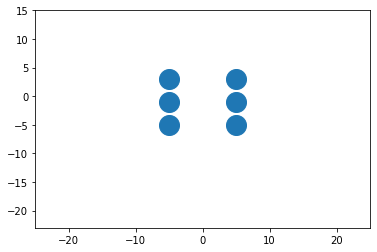

In [4]:
configPlot(r0)

In [5]:
ljeps=.01; ljrmin=4

def simulate(Nt, dt, V2s0, r, p):
    F  = np.zeros(3*Np)
    v  = np.zeros(3*Np)

    for i in range(Nt):
        v, F = v*0, F*0
        p   = filamentOrientation(p, r)
        V2s = V2s0*pystokes.utils.irreducibleTensors(2, p)

        forces.lennardJones (F, r, ljeps, ljrmin )
        forces.multipolymers(Nf, F, r, kBond, kSpring, kBend, kTwist)
        rbm.mobilityTT(v, r, F)

        rbm.propulsionT2s(v, r, V2s)
        r = r + v*dt
        #print (np.max(F), np.max(v), i)

        if i%200==0:
            configPlot(r)
            plt.show()


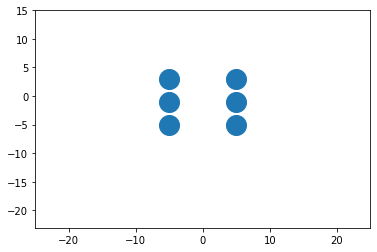

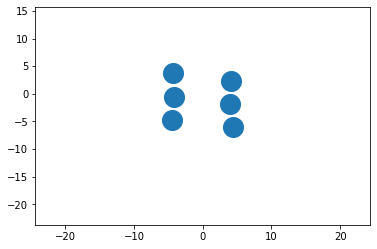

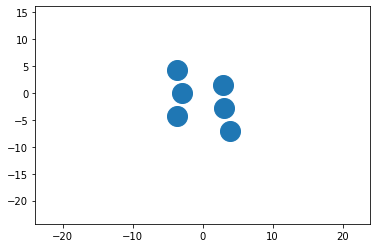

In [6]:
Nt, dt = 600, 0.01
V2s0 = 4. # strength of stresslet
r = r0


simulate(Nt, dt, V2s0, r, p)

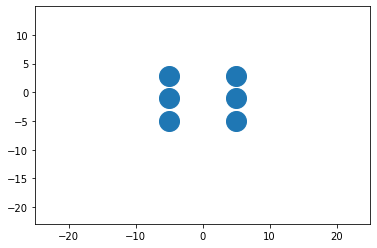

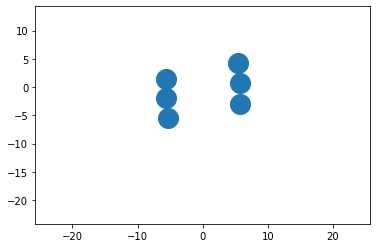

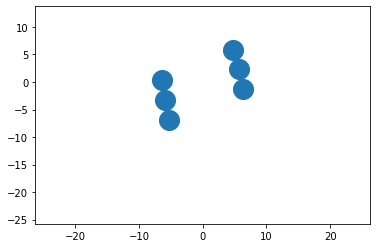

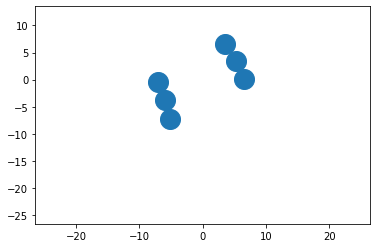

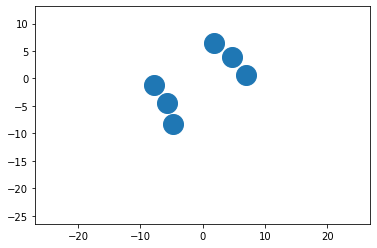

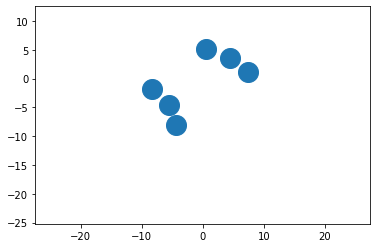

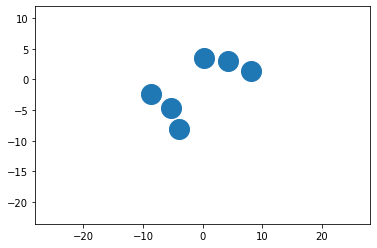

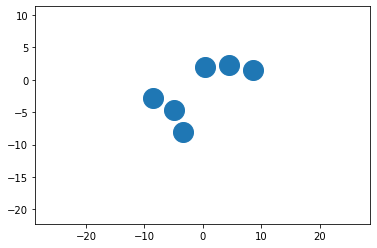

In [7]:
Nt, dt = 1600, 0.01
V2s0 = -4. # strength of stresslet
r = r0

simulate(Nt, dt, V2s0, r, p)